In [17]:
import pandas as pd

# Use raw string to correctly format the file path on Windows
url = r'C:\Users\X521\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\tecnico\Master\Advanced Automation\cenas\AutoAvancada\data\raw\outputRoary24_90\gene_presence_absence.csv'

# Read the CSV file from the local path
df = pd.read_csv(url)

# Function to get the annotation or function of a gene
def get_gene_function(data, gene_name):
    """
    Retrieve the function or annotation for a specified gene.

    Parameters:
    - data: pandas DataFrame containing the data.
    - gene_name: The name of the gene to search for.

    Returns:
    - A string with the gene's function or annotation, or an error message.
    """
    # Check if necessary columns exist
    if "Gene" not in data.columns or "Annotation" not in data.columns:
        return "The necessary columns ('Gene' and 'Annotation') are missing in the data."
    
    # Search for the gene in the 'Gene' column
    result = data[data['Gene'] == gene_name]
    
    if result.empty:
        return f"Gene '{gene_name}' not found in the dataset."
    
    # Return the annotation (function) of the gene
    return result['Annotation'].iloc[0]

# Example usage
gene_name = "rpmG"  # Replace this with the gene you're searching for
function = get_gene_function(df, gene_name)
print(function)



50S ribosomal protein L33


In [1]:
import os
import pandas as pd

def extract_identifiers_from_gff_with_pandas(file_path):
    """
    Extract bacterial identifiers from a .gff file using pandas.
    
    Parameters:
    - file_path: Path to the .gff file.
    
    Returns:
    - A list of identifiers extracted from the .gff file.
    """
    identifiers = []
    try:
        # Read the .gff file into a pandas DataFrame
        df = pd.read_csv(file_path, sep='\t', comment='#', header=None, engine='python')
        
        # Look for '##sequence-region' lines in the header
        with open(file_path, 'r') as file:
            for line in file:
                if line.startswith("##sequence-region"):
                    parts = line.split()
                    if len(parts) > 1:
                        identifiers.append(parts[1])  # Extract the identifier
    
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
    
    return identifiers

def extract_identifiers_from_folder_with_pandas(folder_path):
    """
    Extract bacterial identifiers from all .gff files in a folder using pandas.
    
    Parameters:
    - folder_path: Path to the folder containing .gff files.
    
    Returns:
    - A set of unique bacterial identifiers from all files.
    """
    all_identifiers = set()
    
    # Iterate through all files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".gff"):  # Check for .gff files
            file_path = os.path.join(folder_path, file_name)
            identifiers = extract_identifiers_from_gff_with_pandas(file_path)
            all_identifiers.update(identifiers)  # Add identifiers to the set
    
    return list(all_identifiers)

# Example usage
folder_path = r"C:\Users\X521\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\tecnico\Master\Advanced Automation\cenas\AutoAvancada\data\raw\gff_fasta"  # Replace with your folder path
identifiers = extract_identifiers_from_folder_with_pandas(folder_path)
print("Bacterial Identifiers:")
print(identifiers)


Bacterial Identifiers:
['NZ_CP007392.1', 'NC_017628.1', 'NC_011741.1', 'NZ_CP013112.1', 'NZ_CP010116.1', 'NC_010473.1', 'NZ_CP029164.1', 'NC_011748.1', 'NC_012967.1', 'NC_011750.1', 'NC_020163.1', 'NZ_CP033605.1', 'NC_008253.1', 'NZ_CP048107.1', 'NZ_CP027440.1', 'NZ_CP053785.1', 'NZ_CP019944.1', 'NZ_LR778147.1', 'NZ_CP054388.1', 'NZ_CP043539.1', 'NC_022364.1', 'NZ_CP010121.1', 'NC_000913.3']


In [13]:
import os
import pandas as pd

def extract_genes_by_characteristic(file_path, bacterial_id, characteristic):
    """
    Extract genes with a specific characteristic for a given bacterial identifier from a .gff file.
    
    Parameters:
    - file_path: Path to the .gff file.
    - bacterial_id: The bacterial identifier to search for (e.g., "NC_000913.3").
    - characteristic: The characteristic to filter genes by (e.g., "hypothetical protein").
    
    Returns:
    - A list of gene names that match the characteristic.
    """
    genes = []
    
    try:
        # Read the .gff file into a pandas DataFrame
        gff_data = pd.read_csv(file_path, sep='\t', comment='#', header=None, engine='python')
        
        # Assign column names to the .gff format
        gff_data.columns = [
            "seqid", "source", "type", "start", "end", 
            "score", "strand", "phase", "attributes"
        ]
        
        # Filter rows for the given bacterial identifier and type "CDS"
        filtered_data = gff_data[(gff_data["seqid"] == bacterial_id) & (gff_data["type"] == "CDS")]
        
        # Search for the characteristic in the "attributes" column
        for _, row in filtered_data.iterrows():
            if characteristic in row["attributes"]:
                # Extract the gene name or locus_tag from attributes
                match = None
                if "Name=" in row["attributes"]:
                    match = row["attributes"].split("Name=")[1].split(";")[0]  # Extract the Name
               # elif "locus_tag=" in row["attributes"]:
                #    match = row["attributes"].split("locus_tag=")[1].split(";")[0]  # Extract locus_tag
                
                if match:
                    genes.append(match)
    
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
    
    return genes

def extract_genes_from_folder(folder_path, bacterial_id, characteristic):
    """
    Extract genes with a specific characteristic for a given bacterial identifier across all .gff files in a folder.
    
    Parameters:
    - folder_path: Path to the folder containing .gff files.
    - bacterial_id: The bacterial identifier to search for.
    - characteristic: The characteristic to filter genes by.
    
    Returns:
    - A dictionary where keys are file names and values are lists of matching genes.
    """
    genes_per_file = {}
    
    # Iterate through all files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".gff"):  # Check for .gff files
            file_path = os.path.join(folder_path, file_name)
            genes = extract_genes_by_characteristic(file_path, bacterial_id, characteristic)
            if genes:
                genes_per_file[file_name] = genes
    
    return genes_per_file

# Example usage
folder_path = r"C:\Users\X521\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\tecnico\Master\Advanced Automation\cenas\AutoAvancada\data\raw\gff_fasta"  # Replace with your folder path
bacterial_id = "NC_000913.3"  # Replace with the desired bacterial identifier
characteristic = "hypothetical protein"  # Replace with the characteristic to search for
#
result = extract_genes_from_folder(folder_path, bacterial_id, characteristic)

# Print results
for file_name, genes in result.items():
    print(f"File: {file_name}")
    print(f"Genes with characteristic '{characteristic}':")
    print(genes)
    print()


['PICPPNBC_00004', 'PICPPNBC_00005', 'PICPPNBC_00010', 'PICPPNBC_00011', 'PICPPNBC_00015', 'PICPPNBC_00031', 'PICPPNBC_00053', 'PICPPNBC_00054', 'PICPPNBC_00064', 'PICPPNBC_00102', 'PICPPNBC_00111', 'PICPPNBC_00113', 'PICPPNBC_00116', 'PICPPNBC_00123', 'PICPPNBC_00124', 'PICPPNBC_00142', 'PICPPNBC_00151', 'PICPPNBC_00157', 'PICPPNBC_00168', 'PICPPNBC_00181', 'PICPPNBC_00184', 'PICPPNBC_00188', 'PICPPNBC_00204', 'PICPPNBC_00208', 'PICPPNBC_00212', 'PICPPNBC_00213', 'PICPPNBC_00214', 'PICPPNBC_00220', 'PICPPNBC_00223', 'PICPPNBC_00231', 'PICPPNBC_00235', 'PICPPNBC_00243', 'PICPPNBC_00246', 'PICPPNBC_00247', 'PICPPNBC_00249', 'PICPPNBC_00250', 'PICPPNBC_00251', 'PICPPNBC_00252', 'PICPPNBC_00255', 'PICPPNBC_00257', 'PICPPNBC_00260', 'PICPPNBC_00264', 'PICPPNBC_00278', 'PICPPNBC_00279', 'PICPPNBC_00280', 'PICPPNBC_00281', 'PICPPNBC_00282', 'PICPPNBC_00283', 'PICPPNBC_00285', 'PICPPNBC_00286', 'PICPPNBC_00300', 'PICPPNBC_00310', 'PICPPNBC_00317', 'PICPPNBC_00318', 'PICPPNBC_00319', 'PICPPNBC

In [14]:
import pandas as pd

# Load the file to inspect its contents
file_path = r'C:\Users\X521\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\tecnico\Master\Advanced Automation\cenas\AutoAvancada\data\raw\outputRoary24_90\gene_presence_absence.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
data.head(), data.columns


(     Gene Non-unique Gene name                                     Annotation  \
 0    rpsR                  NaN                      30S ribosomal protein S18   
 1    typA                  NaN                  GTP-binding protein TypA/BipA   
 2  ygdR_2                  NaN                      putative lipoprotein YgdR   
 3    metJ                  NaN                                  Met repressor   
 4    ilvM                  NaN  Acetolactate synthase isozyme 2 small subunit   
 
    No. isolates  No. sequences  Avg sequences per isolate  Genome Fragment  \
 0            24             24                        1.0                1   
 1            24             24                        1.0                1   
 2            24             24                        1.0                1   
 3            24             24                        1.0                1   
 4            24             24                        1.0                1   
 
    Order within Fragment  Acc

In [31]:
# Filter rows with the annotation "hypothetical protein"
filtered_data = data[data['Annotation'] == 'hypothetical protein']

# Extract bacteria columns (presence/absence data)
bacteria_columns = [col for col in data.columns if col.startswith('GCF_')]

# Create a cross-table for filtered genes and bacteria
cross_table = filtered_data[['Gene'] + bacteria_columns].set_index('Gene').notnull()

# Convert the boolean values to 'True'/'False' for clarity
cross_table = cross_table.replace({True: 'X', False: ''})

# Display the resulting table
cross_table.head()



,GCF_000005845,GCF_000007445,GCF_000013305,GCF_000017985,GCF_000019425,GCF_000025745,GCF_000026245,GCF_000026265,GCF_000026345,GCF_000332755,...,GCF_001900315,GCF_002058765,GCF_003018255,GCF_003095635,GCF_003722195,GCF_004377995,GCF_008462425,GCF_010092965,GCF_013201505,GCF_902810335
Gene,,,,,,,,,,,,,,,,,,,,,
higB-2_2,,X,,,,X,X,X,,,...,X,,X,X,,,,X,,
higB-2_1,,X,,,,,X,X,X,,...,,,,X,,X,,X,,
group_6927,,X,X,,,X,,,,,...,,,X,X,,,,,,


In [37]:
# Filter rows where the 'Annotation' column contains "toxin" but not "antitoxin"
filtered_data = data[
    data['Annotation'].str.contains('Virulence', case=False, na=False) &  # Contains "toxin" (case insensitive)
    ~data['Annotation'].str.contains('antitoxin', case=False, na=False)  # Excludes "antitoxin"
]

# Extract bacteria columns (presence/absence data)
bacteria_columns = [col for col in data.columns if col.startswith('GCF_')]

# Create a cross-table for filtered genes and bacteria
cross_table = filtered_data[['Gene'] + bacteria_columns].set_index('Gene').notnull()

# Convert the boolean values to 'True'/'False' for clarity
cross_table = cross_table.replace({True: 'X', False: ''})

# Display the resulting table
cross_table.head()


,GCF_000005845,GCF_000007445,GCF_000013305,GCF_000017985,GCF_000019425,GCF_000025745,GCF_000026245,GCF_000026265,GCF_000026345,GCF_000332755,...,GCF_001900315,GCF_002058765,GCF_003018255,GCF_003095635,GCF_003722195,GCF_004377995,GCF_008462425,GCF_010092965,GCF_013201505,GCF_902810335
Gene,,,,,,,,,,,,,,,,,,,,,
bvgA,X,,,X,X,,X,X,X,X,...,X,X,,,X,X,X,X,X,X
bvgA_2,X,,,,X,,X,,,X,...,,,,,X,,X,,X,
virF,,,,,,,,,,,...,,,,,,X,,,,
group_10488,,,,,,,,,,,...,,,,,,,,,,X
virB,,,,,,,,,,,...,,,,,,,,,,


C:\Users\X521\AppData\Local\Temp\ipykernel_10632\4066689372.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_cross_table = cross_table.replace({'X': 1, '': 0})


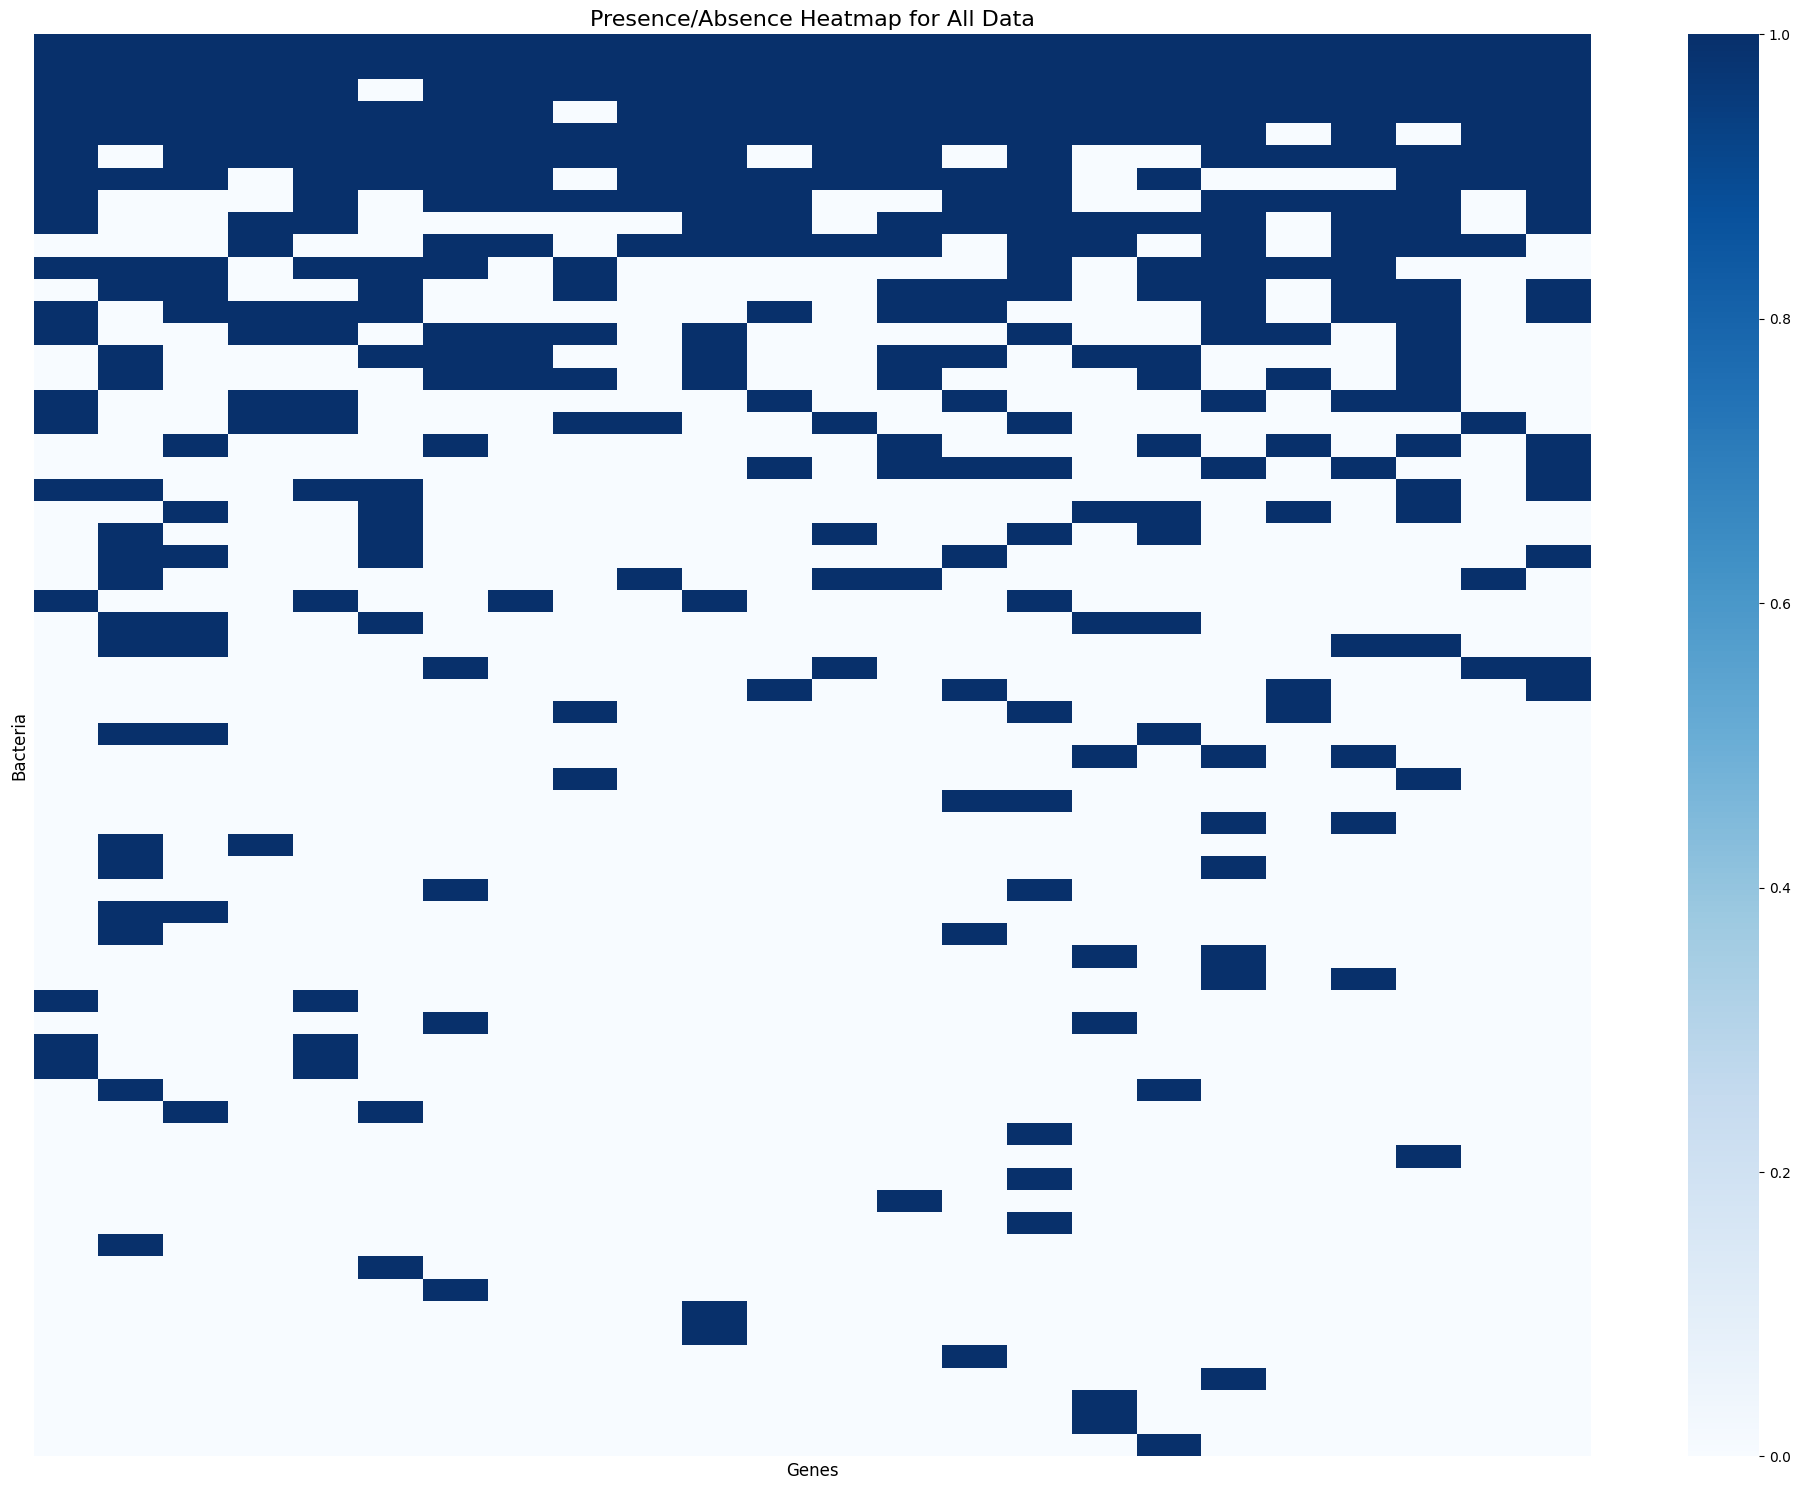

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'X' and '' to numeric values for visualization
numeric_cross_table = cross_table.replace({'X': 1, '': 0})

# Adjust figure size to accommodate the large dataset
plt.figure(figsize=(20, 15))

# Plot the heatmap with a reduced resolution (to make it readable)
sns.heatmap(
    numeric_cross_table,
    cmap='Blues',
    cbar=True,
    xticklabels=False,  # Hide x-axis labels for readability
    yticklabels=False,  # Hide y-axis labels for readability
    rasterized=True     # Optimized for large datasets
)

# Add title
plt.title('Presence/Absence Heatmap for All Data', fontsize=16)
plt.xlabel('Genes', fontsize=12)
plt.ylabel('Bacteria', fontsize=12)

# Show the heatmap
plt.tight_layout()
plt.show()


C:\Users\X521\AppData\Local\Temp\ipykernel_10632\4066689372.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_cross_table = cross_table.replace({'X': 1, '': 0})


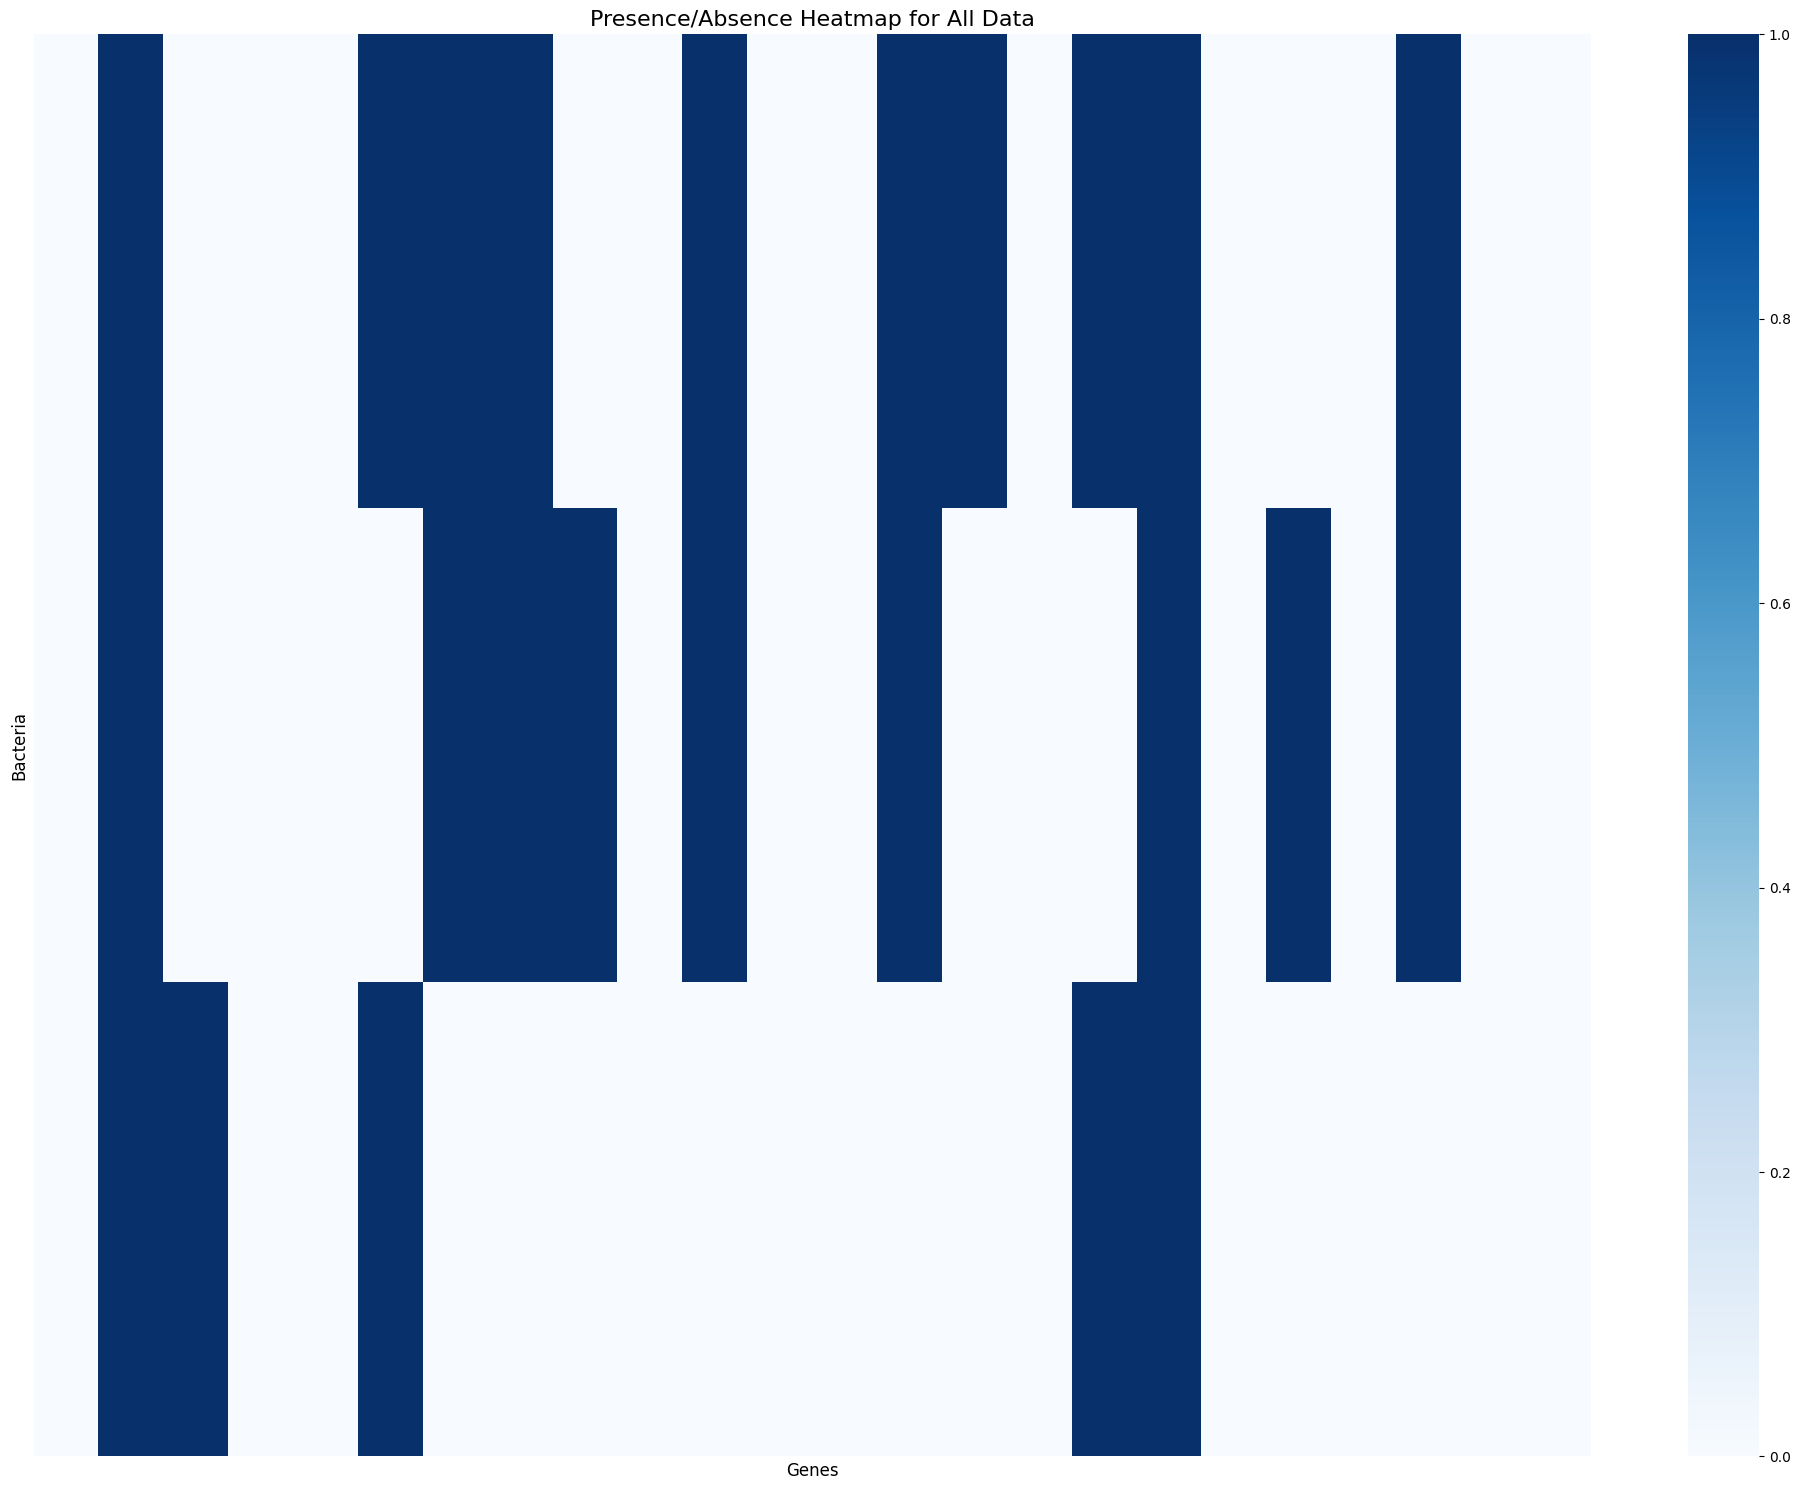

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'X' and '' to numeric values for visualization
numeric_cross_table = cross_table.replace({'X': 1, '': 0})

# Adjust figure size to accommodate the large dataset
plt.figure(figsize=(20, 15))

# Plot the heatmap with a reduced resolution (to make it readable)
sns.heatmap(
    numeric_cross_table,
    cmap='Blues',
    cbar=True,
    xticklabels=False,  # Hide x-axis labels for readability
    yticklabels=False,  # Hide y-axis labels for readability
    rasterized=True     # Optimized for large datasets
)

# Add title
plt.title('Presence/Absence Heatmap for All Data', fontsize=16)
plt.xlabel('Genes', fontsize=12)
plt.ylabel('Bacteria', fontsize=12)

# Show the heatmap
plt.tight_layout()
plt.show()


In [38]:

# Step 3: Count the number of genes with the annotation for each bacterium
genes_with_annotation = filtered_data[bacteria_columns].notnull().sum()

# Step 4: Calculate the total number of genes for each bacterium
total_genes = data[bacteria_columns].notnull().sum()

# Step 5: Calculate the percentage
percentage_with_annotation = (genes_with_annotation / total_genes) * 100

# Display the results
percentage_with_annotation = percentage_with_annotation.sort_values(ascending=False)
print(percentage_with_annotation)
print(genes_with_annotation)

GCF_000005845    0.046458
GCF_000019425    0.045683
GCF_013201505    0.045188
GCF_000332755    0.044494
GCF_001442495    0.044111
GCF_000599665    0.043526
GCF_004377995    0.041955
GCF_902810335    0.041754
GCF_000026245    0.041649
GCF_008462425    0.038212
GCF_003722195    0.037182
GCF_000017985    0.023419
GCF_000026265    0.023180
GCF_001900295    0.022548
GCF_000468515    0.022336
GCF_001900315    0.021891
GCF_000026345    0.020738
GCF_010092965    0.020585
GCF_002058765    0.019873
GCF_003018255    0.000000
GCF_003095635    0.000000
GCF_000007445    0.000000
GCF_000013305    0.000000
GCF_000025745    0.000000
dtype: float64
GCF_000005845    2
GCF_000007445    0
GCF_000013305    0
GCF_000017985    1
GCF_000019425    2
GCF_000025745    0
GCF_000026245    2
GCF_000026265    1
GCF_000026345    1
GCF_000332755    2
GCF_000468515    1
GCF_000599665    2
GCF_001442495    2
GCF_001900295    1
GCF_001900315    1
GCF_002058765    1
GCF_003018255    0
GCF_003095635    0
GCF_003722195    2


In [59]:
"""
import pandas as pd

# Load the file to inspect its contents
file_path = r'C:\Users\X521\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\tecnico\Master\Advanced Automation\cenas\AutoAvancada\data\raw\outputRoary24_90\gene_presence_absence.csv'
data = pd.read_csv(file_path)

# Extract unique words from the 'Annotation' column
annotations = data['Annotation'].dropna()  # Drop missing values
unique_words = set()
nested_word_vector = []

#Split each annotation into words and add them to the set
for annotation in annotations:
    words = annotation.split()  # Split words by whitespace
    unique_words.update(words)  # Add words to the set (eliminates duplicates)
    nested_word_vector.append(list(words))  # Add as a list

# Convert the set to a list for easier handling if needed
unique_words_vector = list(unique_words)

# Create a dictionary to store counts for each unique word
word_counts = {word: 0 for word in unique_words_vector}


# Count occurrences of each word in the nested_word_vector
for word in unique_words_vector:
    for word_list in nested_word_vector:
        if word in word_list:
            word_counts[word] += 1

# Filter words that appear more than once
word_counts_fil = {word: count for word, count in word_counts.items() if count > 1}

# Output the counts
for word, count in word_counts_fil.items():
    print(f"'{word}': {count} times")
"""
print('nada')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 78-79: truncated \UXXXXXXXX escape (2933280724.py, line 38)

In [55]:
from collections import Counter
import pandas as pd

# Load the file to inspect its contents
file_path = r'C:\Users\X521\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\tecnico\Master\Advanced Automation\cenas\AutoAvancada\data\raw\outputRoary24_90\gene_presence_absence.csv'
data = pd.read_csv(file_path)

# Extract unique words from the 'Annotation' column
annotations = data['Annotation'].dropna()  # Drop missing values
nested_word_vector = []

# Split each annotation into words and add them as lists to nested_word_vector
for annotation in annotations:
    words = annotation.split()  # Split words by whitespace
    nested_word_vector.append(list(words))  # Add as a list

# Count occurrences of each word globally
flat_word_list = [word for sublist in nested_word_vector for word in sublist]
global_word_counts = Counter(flat_word_list)

# Filter words that appear more than once globally
word_counts_fil = {word: count for word, count in global_word_counts.items() if count > 1}

# Find the most used word for each row based on the word_counts_fil
most_used_words_per_row = []

for word_list in nested_word_vector:
    # Filter the row's words to only include those in word_counts_fil
    filtered_word_list = [word for word in word_list if word in word_counts_fil]
    if filtered_word_list:
        # Count occurrences of words in the filtered list for this row
        row_word_counts = Counter(filtered_word_list)
        # Find the most frequent word
        most_frequent_word = max(row_word_counts, key=row_word_counts.get)
        most_used_words_per_row.append(most_frequent_word)
    else:
        # If no words from the row are in word_counts_fil, append None or an empty string
        most_used_words_per_row.append(None)

# Output the most used word per row
print(most_used_words_per_row)


['30S', 'GTP-binding', 'putative', 'repressor', 'Acetolactate', '50S', 'Uracil', 'Universal', '30S', 'putative', '50S', 'RNA', 'Peroxiredoxin', 'Transcriptional', 'Glutamine', '50S', 'Regulatory', '50S', '50S', 'NAD(P)H-quinone', '50S', 'ATP-dependent', 'PTS', 'hypothetical', 'diphosphatase', 'Transcriptional', 'Elongation', 'Putrescine', 'CTP', 'Translation', 'Ribulose-phosphate', 'hypothetical', 'Nitrogen', 'ATP', 'Transcription', 'hypothetical', 'Ribosomal', 'Cell', 'factor', 'Phosphate', 'Protein', '50S', 'deacetylase', 'Low-affinity', 'Glyceraldehyde-3-phosphate', 'assembly', 'Septum', 'Cell', '50S', 'Integration', '50S', 'DNA-binding', 'hypothetical', 'ATP-dependent', '50S', '50S', 'Cold', 'hypothetical', 'Small', 'Cell', 'Translation', 'DNA-binding', 'synthase', 'Ribosome', '50S', 'DNA-binding', 'Multidrug', '30S', 'Elongation', 'Chemotaxis', 'dehydratase', 'putative', 'hypothetical', 'phosphoglycerate', 'hypothetical', '50S', 'hypothetical', None, 'Universal', '50S', 'Inner', '

In [74]:
from collections import Counter
import pandas as pd

# Load the file to inspect its contents
file_path = r'C:\Users\X521\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\tecnico\Master\Advanced Automation\cenas\AutoAvancada\data\raw\outputRoary24_90\gene_presence_absence.csv'
data = pd.read_csv(file_path)

# Extract unique words from the 'Annotation' column
annotations = data['Annotation'].dropna()  # Drop missing values
nested_word_vector = []

# Split each annotation into words and add them as lists to nested_word_vector
for annotation in annotations:
    words = annotation.split()  # Split words by whitespace
    nested_word_vector.append(list(words))  # Add as a list

# Count occurrences of each word globally
flat_word_list = [word for sublist in nested_word_vector for word in sublist]
global_word_counts = Counter(flat_word_list)

# Filter words that appear more than once globally
word_counts_fil = {word: count for word, count in global_word_counts.items() if count > 1}

# Find the most used word for each row based on the word_counts_fil without duplicates
most_used_words_set = set()  # Use a set to avoid duplicates

for word_list in nested_word_vector:
    # Filter the row's words to only include those in word_counts_fil
    filtered_word_list = [word for word in word_list if word in word_counts_fil]
    if filtered_word_list:
        # Count occurrences of words in the filtered list for this row
        row_word_counts = Counter(filtered_word_list)
        # Find the most frequent word
        most_frequent_word = max(row_word_counts, key=row_word_counts.get)
        most_used_words_set.add(most_frequent_word)  # Add to the set

# Convert the set to a list for the final result
most_used_words_list = list(most_used_words_set)

for words in most_used_words_set:
    
    # Filter rows where the 'Annotation' column contains "toxin" but not "antitoxin"
    filtered_data = data[
        data['Annotation'].str.contains(words, case=False, na=False)  # Contains "toxin" (case insensitive)
        ]

    # Extract bacteria columns (presence/absence data)
    bacteria_columns = ['GCF_013201505'] #[col for col in data.columns if col.startswith('GCF_')]
    
    # Create a cross-table for filtered genes and bacteria
    cross_table = filtered_data[['Gene'] + bacteria_columns].set_index('Gene').notnull()
    
    # Convert the boolean values to 'True'/'False' for clarity
    cross_table = cross_table.replace({True: 'X', False: ''})
    
    cross_table.head()
    
    # Step 3: Count the number of genes with the annotation for each bacterium
    genes_with_annotation = filtered_data[bacteria_columns].notnull().sum()
    
    # Step 4: Calculate the total number of genes for each bacterium
    total_genes = data[bacteria_columns].notnull().sum()

    # Step 5: Calculate the percentage
    percentage_with_annotation = (genes_with_annotation / total_genes) * 100
    
    # Display the results
percentage_with_annotation = percentage_with_annotation.sort_values(ascending=False)
print(percentage_with_annotation)
print(genes_with_annotation)

C:\Users\X521\AppData\Local\Temp\ipykernel_10632\1664495426.py:44: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data['Annotation'].str.contains(words, case=False, na=False)  # Contains "toxin" (case insensitive)
C:\Users\X521\AppData\Local\Temp\ipykernel_10632\1664495426.py:44: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data['Annotation'].str.contains(words, case=False, na=False)  # Contains "toxin" (case insensitive)
C:\Users\X521\AppData\Local\Temp\ipykernel_10632\1664495426.py:44: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data['Annotation'].str.contains(words, case=False, na=False)  # Contains "toxin" (case insensitive)


error: nothing to repeat at position 10

In [12]:
from collections import Counter
import pandas as pd
import nltk
from nltk.corpus import words

pd.set_option('display.max_rows', 500)


# Download the word list (only needed once)
nltk.download("words")

# Get the list of English words
english_words = set(words.words())
english_words.add("Multidrug")

# Load the file
file_path = r'C:\Users\X521\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\tecnico\Master\Advanced Automation\cenas\AutoAvancada\data\raw\outputRoary24_90\gene_presence_absence.csv'
data = pd.read_csv(file_path)

# Extract unique words from the 'Annotation' column
annotations = data['Annotation'].dropna()  # Drop missing values
nested_word_vector = []

# Split each annotation into words and add them as lists to nested_word_vector
for annotation in annotations:
    name_list = annotation.split()  # Split words by whitespace
    # Filter only valid English words
    valid_names = [word for word in name_list if len(word) > 1]
    nested_word_vector.append(valid_names)  # Add the filtered list

# Count occurrences of each word globally
flat_word_list = [word for sublist in nested_word_vector for word in sublist]
global_word_counts = Counter(flat_word_list)

# Filter words that appear more than once globally
word_counts_fil = {word: count for word, count in global_word_counts.items() if count > 1}

# Get unique words to analyze
most_used_words_list = list(word_counts_fil.keys())

# List to store percentages for each word
results = []

# Calculate percentage for each word in `most_used_words_list`
for word in most_used_words_list:
    # Filter rows where the 'Annotation' column contains the word (disable regex)
    filtered_data = data[
        data['Annotation'].str.contains(word, case=False, na=False, regex=False)
    ]

    # Extract bacteria columns
    bacteria_columns = 'GCF_000007445'#[col for col in data.columns if col.startswith('GCF_')]

    # Count the number of genes with the annotation for each bacterium
    genes_with_annotation = filtered_data[bacteria_columns].notnull().sum()

    # Calculate the total number of genes for each bacterium
    total_genes = data[bacteria_columns].notnull().sum()

    # Calculate the percentage
    percentage_with_annotation = (genes_with_annotation / total_genes) * 100

    # Save the word and its percentage
    results.append({
        "word": word,
        "percentage": percentage_with_annotation.mean()  # Mean percentage across all bacteria
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Sort by percentage
results_df = results_df.sort_values(by="percentage", ascending=False)

# Display the results
print(results_df)



[nltk_data] Downloading package words to
[nltk_data]     C:\Users\X521\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


                 word  percentage
0             protein   52.374130
15       hypothetical   24.498567
221               ion    9.496521
1            putative    8.227589
9           transport    5.382726
85           transfer    5.341793
5             subunit    4.748260
186           binding    4.093328
100     transcription    4.072861
38           membrane    3.990995
31          regulator    3.909128
30    transcriptional    3.765862
24          phosphate    3.745395
165              type    3.540729
10             system    3.315596
75          reductase    3.295129
25        transporter    2.742530
26      dehydrogenase    2.660663
150             inner    2.558330
43             kinase    2.415063
49             family    2.292264
242            acetyl    2.026197
14          component    1.698731
211          specific    1.637331
65              amino    1.596398
8              factor    1.575931
58               acid    1.371265
18         regulatory    1.350798
77        phos

In [93]:
from collections import Counter
import pandas as pd

pd.set_option('display.max_rows', 500)
# Load the file
file_path = r'C:\Users\X521\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\tecnico\Master\Advanced Automation\cenas\AutoAvancada\data\raw\outputRoary24_90\gene_presence_absence.csv'
data = pd.read_csv(file_path)

# Extract unique words from the 'Annotation' column
annotations = data['Annotation'].dropna()  # Drop missing values
nested_word_vector = []

# Split each annotation into words and add them as lists to nested_word_vector
for annotation in annotations:
    name_list = annotation.split()  # Split words by whitespace
    # Filter only valid English words
    valid_names = [word for word in name_list if len(word) > 1]
    nested_word_vector.append(valid_names)  # Add the filtered list

# Count occurrences of each word globally
flat_word_list = [word for sublist in nested_word_vector for word in sublist]
global_word_counts = Counter(flat_word_list)

# Filter words that appear more than once globally
word_counts_fil = {word: count for word, count in global_word_counts.items() if count > 1}

# Get unique words to analyze
most_used_words_list = list(word_counts_fil.keys())

# List to store percentages for each word
results = []

# Calculate percentage for each word in `most_used_words_list`
for word in most_used_words_list:
    # Filter rows where the 'Annotation' column contains the word (disable regex)
    filtered_data = data[
        data['Annotation'].str.contains(word, case=False, na=False, regex=False)
    ]

    # Extract bacteria columns
    bacteria_columns = 'GCF_000007445'#[col for col in data.columns if col.startswith('GCF_')]

    # Count the number of genes with the annotation for each bacterium
    genes_with_annotation = filtered_data[bacteria_columns].notnull().sum()

    # Calculate the total number of genes for each bacterium
    total_genes = data[bacteria_columns].notnull().sum()

    # Calculate the percentage
    percentage_with_annotation = (genes_with_annotation / total_genes) * 100

    # Save the word and its percentage
    results.append({
        "word": word,
        "percentage": percentage_with_annotation.mean(),  # Mean percentage across all bacteria
        "number": genes_with_annotation
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Sort by percentage
results_df = results_df.sort_values(by="number", ascending=False)

# Display the results
print(results_df)

categorias = {}
dados = []  # List to track seen words

for word in results_df["word"]:  # Assuming 'results_df' has a column named 'word'
    # Filter rows where the 'Annotation' column contains the word
    
    lines = data[
        data['Annotation'].str.contains(word, case=False, na=False, regex=False)
    ]["Annotation"]
    if word in dados and word.lower() == "protein":
   
        
        # Loop through each line in 'lines'
        
        for category, words in categorias.items():
            if any(w in annotation for w in words):  # Check if any word from the category is in the annotation
                category_found = True  # Mark as found
                categorias[category].append(word)  # Append the word to the existing category              
                break  # Stop checking after finding one category
            
    else:
        # Add the word as a new key with a list containing only the word
        categorias[word] = [word]

    # Add the words from the annotations to the 'dados' list
    for line in lines:
        dados.extend(line.split())






                     word  percentage  number
2                 protein   52.374130    2559
69                Protein   52.374130    2559
44           hypothetical   24.498567    1197
706                    IV   10.560786     516
1462                  ion    9.496521     464
...                   ...         ...     ...
1824                 IS1F    0.000000       0
1828                 LpfD    0.000000       0
1830               ISEc31    0.000000       0
1832  tRNA(fMet)-specific    0.000000       0
2083                 OspG    0.000000       0

[2084 rows x 3 columns]


In [96]:

# Print only the keys (titles) in categorias
for category in categorias:
    print(category)
title = "toxin"  # Replace with the title you want
if title in categorias:
    data_for_title = categorias[title]
    print(data_for_title)
else:
    print(f"Title '{title}' not found in categorias.")

protein
Protein
hypothetical
IV
ion
Era
putative
Putative
transport
transfer
transferase
subunit
DinG
binding
transcription
Transcription
Membrane
membrane
AD
regulator
Regulator
transcriptional
Transcriptional
Phosphate
phosphate
LtrA
Type
type
Hydrogen
system
reductase
Hydrogenase
synthase
RNA
ATP
transporter
dehydrogenase
permease
Inner
inner
kinase
family
HTH-type
II
transposase
acetyl
Acetyl
Ribosomal
ribosomal
DNA
ATP-binding
component
Rep
specific
amino
factor
tRNA
NAD
ligase
Acid
acid
Regulatory
regulatory
phosphatase
beta
Acyl
acyl
repressor
methyltransferase
of
for
S6
PTS
hydrolase
IS6
chain
Chain
TatE
alpha
outer
Outer
Nuclease
export
import
nuclease
carboxyl
Fimbria
Fimbrial
fimbrial
hydratase
ABC
protease
Protease
ECA
Oxidoreductase
oxidoreductase
Tu
carrier
Periplasmic
drug
periplasmic
isomerase
multidrug
Multidrug
IS3
synthesis
operon
50S
Chaperone
lyase
activator
Peptide
chaperone
dehydratase
esterase
serine
Peptidase
peptidase
Lipoprotein
lipoprotein
Serine
enzyme
Toxi

In [95]:
categorias = {}
dados = []  # List to track seen words

for word in results_df["word"]:  # Loop through the most used words
    # Filter rows where the 'Annotation' column contains the word
    lines = data[
        data['Annotation'].str.contains(word, case=False, na=False, regex=False)
    ]["Annotation"]

    # Check if the word has already been categorized
    if word in dados:
        # Search for the word in the existing hierarchy
        for category, subcategories in categorias.items():
            for subword, subcategories2 in subcategories.items():
                if word in subcategories2:
                    categorias[category][subword][word] = {}
                    break
            else:
                if word in subcategories:
                    categorias[category][word] = {}
                    break
    else:
        # If the word is new, add it as a new top-level category
        categorias[word] = {}

    # Process the annotations and add words to the hierarchy
    for line in lines:
        words_in_line = line.split()
        for subword in words_in_line:
            if subword in results_df["word"].values and subword != word:
                # Build hierarchy for subcategories
                if word in categorias:
                    if subword not in categorias[word]:
                        categorias[word][subword] = {}
                else:
                    categorias[word] = {subword: {}}

    # Add the words from the current annotation to the 'dados' list
    dados.extend(words_in_line)

# Print the resulting hierarchy
import pprint

# Pretty print with more indentation for better readability
pprint.pprint(categorias, width=80, indent=4)



KeyboardInterrupt: 

In [82]:
print(categorias)

{'protein': {'30S': {}, 'ribosomal': {}, 'GTP-binding': {}, 'putative': {}, 'lipoprotein': {}, 'YgdR': {}, '50S': {}, 'Universal': {}, 'stress': {}, 'Glutamine': {}, 'transport': {}, 'system': {}, 'permease': {}, 'L2': {}, 'Regulatory': {}, 'L11': {}, 'L31': {}, 'ATP-dependent': {}, 'Clp': {}, 'protease': {}, 'adapter': {}, 'hypothetical': {}, 'Elongation': {}, 'factor': {}, 'Putrescine': {}, 'export': {}, 'ATP-binding': {}, 'Nitrogen': {}, 'regulatory': {}, 'P-II': {}, 'Transcription': {}, 'antitermination': {}, 'Phosphate': {}, 'import': {}, 'Protein': {}, 'L36': {}, 'Septum': {}, 'site-determining': {}, 'Cell': {}, 'division': {}, 'DNA-binding': {}, 'Cold': {}, 'shock-like': {}, 'Small': {}, 'FtsA': {}, 'H-NS': {}, 'Multidrug': {}, 'efflux': {}, 'pump': {}, 'accessory': {}, 'Chemotaxis': {}, 'dehydratase': {}, 'Inner': {}, 'membrane': {}, 'Sec-independent': {}, 'translocase': {}, 'L16': {}, 'Major': {}, 'outer': {}, 'family': {}, 'Phage': {}, 'shock': {}, 'L3': {}, 'Iron-sulfur': {}